In [1]:
import pandas as pd
import numpy as np

## Opening file from different sources

In [2]:
from sqlalchemy import create_engine

In [6]:
engine = create_engine('sqlite:///db_bello_customers.db')
bellodb = pd.read_sql_table('Payments', engine)
print(bellodb.shape)
bellodb.head()

(100, 6)


,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [7]:
belloexcel = pd.read_excel('/content/lcl_bello_sales.xlsx')
print(belloexcel.shape)
belloexcel.head()

(100, 2)


,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [8]:
bellocld = pd.read_csv('https://raw.githubusercontent.com/SameerJain901/datasets/master/cld_bello_customers.csv')
print(bellocld.shape)
bellocld.head( )

(100, 5)


,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


## Merging file and data


In [9]:
bellocld.drop(['CustomerID','PaymentMode'], axis =1, inplace = True)
bellodb.drop('CustomerID', axis =1, inplace = True)
bellocld.shape, bellodb.shape

((100, 3), (100, 5))

In [10]:
# concat and join
# concat is just joining whereas join will match and join on the bases of particular index or object
data = pd.concat([belloexcel, bellodb, bellocld], axis =1)
print(data.shape)
data.head( )

(100, 10)


,CustomerID,Price,Date,PaymentMode,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
0,10471,₹ 675036.2138626401,16/08/20,Creditcard,Economy,Female,17.0,coates,1 start,8736
1,10472,"€ 2,315.53",2/8/2020 0:00,Ewallet,Mail,Unspecified,12.0,dresses,2 star,8547
2,10473,₹ 611426.29122378,8/8/2020 0:00,Prepaid Card,Mail,None,10.0,NaN,2 star,9833
3,10474,₹ 210869.48083470002,None,Directdeposit,Normal,Female,2133.0,dresses,2star,7591
4,10475,₹ 679422.2811434,24/08/20,None,Economy,Male,2133.0,pantas,1 start,5131


In [11]:
data.columns

Index(['CustomerID', 'Price', 'Date', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime', 'ProductType', 'Rating', 'Total_Ratings'],
      dtype='object')

In [12]:
newcolumns = ['Date', 'CustomerID', 'PaymentMode', 'Price', 'ShippingMode', 'Gender',
       'ShippingTime', 'ProductType', 'Rating', 'Total_Ratings' ]
data = data[newcolumns]
print(data.shape)
data.head()

(100, 10)


,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
0,16/08/20,10471,Creditcard,₹ 675036.2138626401,Economy,Female,17.0,coates,1 start,8736
1,2/8/2020 0:00,10472,Ewallet,"€ 2,315.53",Mail,Unspecified,12.0,dresses,2 star,8547
2,8/8/2020 0:00,10473,Prepaid Card,₹ 611426.29122378,Mail,None,10.0,NaN,2 star,9833
3,None,10474,Directdeposit,₹ 210869.48083470002,Normal,Female,2133.0,dresses,2star,7591
4,24/08/20,10475,None,₹ 679422.2811434,Economy,Male,2133.0,pantas,1 start,5131


In [13]:
data.to_csv('Mergeddata.csv', index = False)


#Duplicate entries

In [14]:
data[data.duplicated( )]

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
88,31/08/20,10558,Credit Card,₹ 234895.78095268,Normal,Unspecified,11.0,coates,5 star,7007
89,31/08/20,10558,Credit Card,₹ 234895.78095268,Normal,Unspecified,11.0,coates,5 star,7007


In [15]:
data[data['CustomerID'] == 10558]


,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
87,31/08/20,10558,Credit Card,₹ 234895.78095268,Normal,Unspecified,11.0,coates,5 star,7007
88,31/08/20,10558,Credit Card,₹ 234895.78095268,Normal,Unspecified,11.0,coates,5 star,7007
89,31/08/20,10558,Credit Card,₹ 234895.78095268,Normal,Unspecified,11.0,coates,5 star,7007


In [16]:
data.drop_duplicates(inplace = True)
print(data.shape)

(98, 10)


# Outlier -Shipping Time

<Axes: >

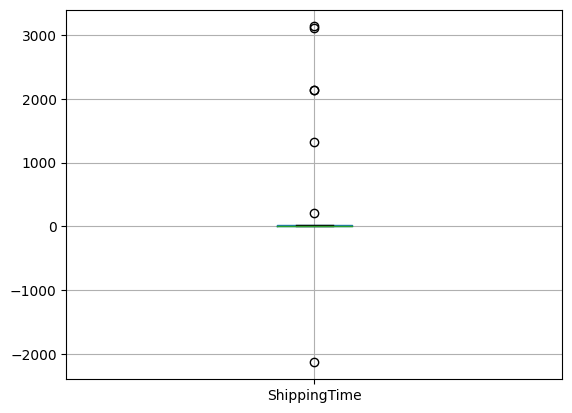

In [17]:
data.boxplot(column = 'ShippingTime')

In [18]:
Q1 = data['ShippingTime'].quantile(0.25)
Q3 = data['ShippingTime'].quantile(0.75)
IQR = Q3-Q1
LowerCutOff = Q1-1.5*IQR
HigherCutOff = Q3+1.5*IQR
min = data['ShippingTime'].min()
max = data['ShippingTime'].max()
min, LowerCutOff, Q1, Q3,HigherCutOff, max, IQR

(-2131.0, -4.5, 9.0, 18.0, 31.5, 3132.0, 9.0)

In [19]:
# DATA above Highercutoff
data[data['ShippingTime']> HigherCutOff]


,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
3,None,10474,Directdeposit,₹ 210869.48083470002,Normal,Female,2133.0,dresses,2star,7591
4,24/08/20,10475,None,₹ 679422.2811434,Economy,Male,2133.0,pantas,1 start,5131
27,19/08/20,10498,Direct Deposit,₹ 635118.07344224,Express,Unspecified,213.0,Coats/Jackets,3 star,9297
43,14/08/20,10514,Credit Card,"€ 7,261.79",Express,Unspecified,1321.0,dresses,5 star,5567
59,17/08/20,10530,Cash,"$8,670.69",Economy,Female,3113.0,Cardigan,4 star,6930
71,20/08/20,10542,Cash,₹ 708227.40839738,Mail,Male,3132.0,Hats,2star,9157


In [20]:
# DATA below Lowercutoff
data[data['ShippingTime']< LowerCutOff]

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
98,26/08/20,10569,Directdeposit,£ 4118.0053827500005,Economy,Male,-2131.0,Pants,5 star,5200


In [ ]:
# this is to combine all both and see
# we can ddirectky drop as well
# | means OR
data[(data['ShippingTime']> HigherCutOff) | (data['ShippingTime']< LowerCutOff)]

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
3,None,10474,Directdeposit,₹ 210869.48083470002,Normal,Female,2133.0,dresses,2star,7591
4,24/08/20,10475,None,₹ 679422.2811434,Economy,Male,2133.0,pantas,1 start,5131
27,19/08/20,10498,Direct Deposit,₹ 635118.07344224,Express,Unspecified,213.0,Coats/Jackets,3 star,9297
43,14/08/20,10514,Credit Card,"€ 7,261.79",Express,Unspecified,1321.0,dresses,5 star,5567
59,17/08/20,10530,Cash,"$8,670.69",Economy,Female,3113.0,Cardigan,4 star,6930
71,20/08/20,10542,Cash,₹ 708227.40839738,Mail,Male,3132.0,Hats,2star,9157
98,26/08/20,10569,Directdeposit,£ 4118.0053827500005,Economy,Male,-2131.0,Pants,5 star,5200


In [21]:
print(data.shape)
# rows will be axis = 0
data.drop([3,4,27,43,59,71,98], axis = 0, inplace = True )
print(data.shape)

(98, 10)
(91, 10)


<Axes: >

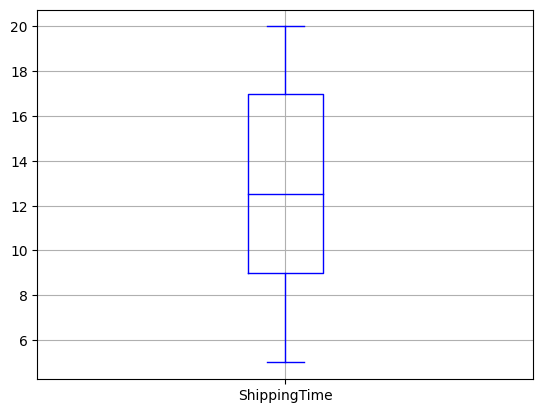

In [22]:
data.boxplot(column = 'ShippingTime', color = 'blue')

# Empty Records

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    86 non-null     object 
 3   Price          90 non-null     object 
 4   ShippingMode   88 non-null     object 
 5   Gender         86 non-null     object 
 6   ShippingTime   90 non-null     float64
 7   ProductType    87 non-null     object 
 8   Rating         85 non-null     object 
 9   Total_Ratings  91 non-null     int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 7.8+ KB


In [24]:
# To find null data type
data[data.ProductType.isna()]

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
2,8/8/2020 0:00,10473,Prepaid Card,₹ 611426.29122378,Mail,None,10.0,NaN,2 star,9833
31,30/08/20,10502,Ewallet,"€ 5,242.22",Normal,Female,16.0,NaN,3 star,8823
32,30/08/20,10503,Prepaid Card,₹ 110529.79150523999,Express,None,8.0,NaN,4 star,8117
33,24/08/20,10504,Ewallet,"€ 5,546.63",Normal,Female,14.0,NaN,1 start,5037


In [25]:

#change the databtype of missing value and then mode. For this fill the maximum repeated value.
data.PaymentMode = data.PaymentMode.astype('string')
data.Price = data.Price.astype('string')
data.ShippingMode = data.ShippingMode.astype('string')
data.Gender = data.Gender.astype('string')
data.ShippingTime = data.ShippingTime.astype('float64')
data.ProductType = data.ProductType.astype('string')
data.Rating = data.Rating.astype('string')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    86 non-null     string 
 3   Price          90 non-null     string 
 4   ShippingMode   88 non-null     string 
 5   Gender         86 non-null     string 
 6   ShippingTime   90 non-null     float64
 7   ProductType    87 non-null     string 
 8   Rating         85 non-null     string 
 9   Total_Ratings  91 non-null     int64  
dtypes: float64(1), int64(2), object(1), string(6)
memory usage: 7.8+ KB


In [27]:
#TO FIND THE MOST REPEATING VALUE
print(data.ProductType.mode())
print(data.ShippingMode.mode())

0    coates
Name: ProductType, dtype: string
0    Mail
Name: ShippingMode, dtype: string


In [28]:
# TO FILL EMPTY PLACES
data.PaymentMode.fillna(data.PaymentMode.mode()[0], inplace =True)
#data.Price.fillna(data.Price.mode()[0], inplace =True)
data.ShippingMode.fillna(data.ShippingMode.mode()[0], inplace =True)
data.Gender.fillna(data.Gender.mode()[0], inplace =True)
data.ProductType.fillna(data.ProductType.mode()[0], inplace =True)
data.Rating.fillna(data.Rating.mode()[0], inplace =True)


In [29]:
#shipping fill with mean or mode anything as outlier data is done away and we have string data type
data.ShippingTime.fillna(data.ShippingTime.mean(), inplace =True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    91 non-null     string 
 3   Price          90 non-null     string 
 4   ShippingMode   91 non-null     string 
 5   Gender         91 non-null     string 
 6   ShippingTime   91 non-null     float64
 7   ProductType    91 non-null     string 
 8   Rating         91 non-null     string 
 9   Total_Ratings  91 non-null     int64  
dtypes: float64(1), int64(2), object(1), string(6)
memory usage: 7.8+ KB


# Manupilating values

In [31]:
# how to handle Typos
data.ProductType.unique( )

<StringArray>
[       'coates',      'dresses ', 'Coats/Jackets',         'Jeans',
        'pantas',         'Pants',      'Cardigan',       'Dresses',
   'Shirts/Tops',          'Hats']
Length: 10, dtype: string

In [32]:
ProductTypes = list(data.ProductType.unique())
PaymentModes = list(data.PaymentMode.unique())
Sex = list(data.Gender.unique())
Ratings = list(data.Rating.unique())
ShippingModes = list(data.ShippingMode.unique())
print(ProductTypes)
print(PaymentModes)
print(Sex)
print(Ratings)
print(ShippingModes )

['coates', 'dresses ', 'Coats/Jackets', 'Jeans', 'pantas', 'Pants', 'Cardigan', 'Dresses', 'Shirts/Tops', 'Hats']
['Creditcard', 'Ewallet', 'Prepaid Card', 'Direct Deposit', 'Mobile Payment', 'Cash', 'Mobile', 'Credit Card', 'Directdeposit']
['Female', 'Unspecified', 'Male']
['1 start', '2 star', '5 star', '4 star', '2star', '3 star']
['Economy', 'Mail', 'Express', 'Normal']


In [33]:
def rectifyProductTypes(prod):
  if prod == 'coates':
    return 'Coats/Jackets'
  elif prod == 'dresses ':
    return 'Dresses'
  elif prod == 'pantas':
    return 'Pants'
  else:
   return prod

def rectifyPaymentsModes(pay):
  if pay == 'Creditcard':
    return 'Credit Card'
  elif pay == 'Directdeposit':
    return 'Direct Deposit'
  elif pay == 'Mobile':
    return 'Mobile Payment'
  else:
    return pay

def rectifyRatings(rate):
  if rate == '1 start':
    return '1 star'
  elif rate == '2star':
    return '2 star'
  else:
    return rate

In [34]:
# apply is like cycle iterate krega like for loop
data.ProductType = data.ProductType.apply(rectifyProductTypes)
data.PaymentMode = data.PaymentMode.apply(rectifyPaymentsModes)
data.Rating =  data.Rating.apply(rectifyRatings)

In [35]:
ProductTypes = list(data.ProductType.unique())
PaymentModes = list(data.PaymentMode.unique())
Ratings = list(data.Rating.unique())
print(ProductTypes)
print(PaymentModes)
print(Ratings)


['Coats/Jackets', 'Dresses', 'Jeans', 'Pants', 'Cardigan', 'Shirts/Tops', 'Hats']
['Credit Card', 'Ewallet', 'Prepaid Card', 'Direct Deposit', 'Mobile Payment', 'Cash']
['1 star', '2 star', '5 star', '4 star', '3 star']


# Converting date from tring to datatime type

In [36]:
data.head()

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
0,16/08/20,10471,Credit Card,₹ 675036.2138626401,Economy,Female,17.0,Coats/Jackets,1 star,8736
1,2/8/2020 0:00,10472,Ewallet,"€ 2,315.53",Mail,Unspecified,12.0,Dresses,2 star,8547
2,8/8/2020 0:00,10473,Prepaid Card,₹ 611426.29122378,Mail,Male,10.0,Coats/Jackets,2 star,9833
5,28/08/20,10476,Direct Deposit,<NA>,Mail,Female,20.0,Coats/Jackets,2 star,5347
6,8/8/2020 0:00,10477,Direct Deposit,£ 6610.077565000001,Mail,Unspecified,14.0,Coats/Jackets,5 star,9406


In [37]:
data.Date =  pd.to_datetime(data.Date, dayfirst = True)
data.head( )

<ipython-input-37-c2946050d313>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.Date =  pd.to_datetime(data.Date, dayfirst = True)


,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
0,2020-08-16,10471,Credit Card,₹ 675036.2138626401,Economy,Female,17.0,Coats/Jackets,1 star,8736
1,2020-08-02,10472,Ewallet,"€ 2,315.53",Mail,Unspecified,12.0,Dresses,2 star,8547
2,2020-08-08,10473,Prepaid Card,₹ 611426.29122378,Mail,Male,10.0,Coats/Jackets,2 star,9833
5,2020-08-28,10476,Direct Deposit,<NA>,Mail,Female,20.0,Coats/Jackets,2 star,5347
6,2020-08-08,10477,Direct Deposit,£ 6610.077565000001,Mail,Unspecified,14.0,Coats/Jackets,5 star,9406


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   Price          90 non-null     string        
 4   ShippingMode   91 non-null     string        
 5   Gender         91 non-null     string        
 6   ShippingTime   91 non-null     float64       
 7   ProductType    91 non-null     object        
 8   Rating         91 non-null     object        
 9   Total_Ratings  91 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), string(3)
memory usage: 9.9+ KB


In [39]:
data.dtypes

,0
Date,datetime64[ns]
CustomerID,int64
PaymentMode,object
Price,string[python]
ShippingMode,string[python]
Gender,string[python]
ShippingTime,float64
ProductType,object
Rating,object
Total_Ratings,int64


In [40]:
data.ProductType = data.ProductType.astype('category')
data.dtypes

,0
Date,datetime64[ns]
CustomerID,int64
PaymentMode,object
Price,string[python]
ShippingMode,string[python]
Gender,string[python]
ShippingTime,float64
ProductType,category
Rating,object
Total_Ratings,int64


# Grouping // Groupby


In [41]:
data.groupby('ShippingMode').groups

{'Economy': [0, 10, 16, 18, 19, 20, 28, 34, 35, 36, 40, 41, 54, 57, 61, 70, 83], 'Express': [8, 9, 12, 13, 21, 25, 26, 32, 38, 44, 52, 65, 67, 69, 74, 75, 76, 81, 82, 86, 91, 95], 'Mail': [1, 2, 5, 6, 7, 11, 14, 15, 17, 23, 24, 29, 37, 39, 42, 51, 56, 58, 64, 72, 73, 77, 78, 84, 90, 92, 94, 99], 'Normal': [22, 30, 31, 33, 45, 46, 47, 48, 49, 50, 53, 55, 60, 62, 63, 66, 68, 79, 80, 85, 87, 93, 96, 97]}

In [42]:
data.groupby('ShippingMode').ShippingTime.agg([np.mean, np.max, np.min])

<ipython-input-42-6d20e2d193e0>:1: FutureWarning: The provided callable <function mean at 0x7fe761d1bd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby('ShippingMode').ShippingTime.agg([np.mean, np.max, np.min])
<ipython-input-42-6d20e2d193e0>:1: FutureWarning: The provided callable <function max at 0x7fe761d1b490> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.groupby('ShippingMode').ShippingTime.agg([np.mean, np.max, np.min])
<ipython-input-42-6d20e2d193e0>:1: FutureWarning: The provided callable <function min at 0x7fe761d1b5b0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.groupby('Shippi

,mean,max,min
ShippingMode,,,
Economy,15.176471,20.0,8.0
Express,12.310101,20.0,5.0
Mail,12.857143,20.0,5.0
Normal,11.583333,18.0,5.0


In [43]:
groupedData = data.groupby('ShippingMode')
groupedData.groups

{'Economy': [0, 10, 16, 18, 19, 20, 28, 34, 35, 36, 40, 41, 54, 57, 61, 70, 83], 'Express': [8, 9, 12, 13, 21, 25, 26, 32, 38, 44, 52, 65, 67, 69, 74, 75, 76, 81, 82, 86, 91, 95], 'Mail': [1, 2, 5, 6, 7, 11, 14, 15, 17, 23, 24, 29, 37, 39, 42, 51, 56, 58, 64, 72, 73, 77, 78, 84, 90, 92, 94, 99], 'Normal': [22, 30, 31, 33, 45, 46, 47, 48, 49, 50, 53, 55, 60, 62, 63, 66, 68, 79, 80, 85, 87, 93, 96, 97]}

In [44]:
ecogroup = groupedData.get_group('Economy')
ecogroup

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
0,2020-08-16,10471,Credit Card,₹ 675036.2138626401,Economy,Female,17.0,Coats/Jackets,1 star,8736
10,2020-08-21,10481,Direct Deposit,"€ 3,702.54",Economy,Female,17.0,Dresses,2 star,7750
16,2020-08-17,10487,Credit Card,£ 25773831.320659,Economy,Female,19.0,Pants,2 star,5783
18,2020-08-17,10489,Direct Deposit,"€ 1,749.40",Economy,Unspecified,17.0,Shirts/Tops,4 star,7273
19,2020-08-14,10490,Direct Deposit,"$6,221.36",Economy,Female,17.0,Shirts/Tops,1 star,9296
20,2020-08-05,10491,Prepaid Card,"€ 1,514.11",Economy,Female,20.0,Coats/Jackets,1 star,9714
28,2020-08-30,10499,Cash,₹ 176647.10500702,Economy,Male,17.0,Pants,4 star,7160
34,2020-08-29,10505,Prepaid Card,"$1,024.64",Economy,Male,15.0,Shirts/Tops,3 star,5757
35,2020-08-07,10506,Ewallet,"$4,313.74",Economy,Female,13.0,Dresses,2 star,7858
36,2020-08-11,10507,Direct Deposit,£ 7236.8351195000005,Economy,Male,19.0,Dresses,1 star,5848


In [45]:
ratingGroup = data.groupby('Rating')
ratingGroup.groups

{'1 star': [0, 7, 9, 13, 14, 15, 19, 20, 26, 29, 33, 36, 38, 39, 42, 51, 52, 56, 57, 60, 65, 69, 73, 84, 85, 86, 90, 94, 99], '2 star': [1, 2, 5, 10, 16, 23, 35, 41, 47, 48, 55, 58, 61, 66, 67, 74, 80, 91, 93, 95], '3 star': [31, 34, 45, 53, 76, 77, 78, 82, 92, 97], '4 star': [8, 12, 18, 21, 22, 24, 25, 28, 30, 32, 37, 40, 44, 49, 50, 63, 68, 72, 75, 83], '5 star': [6, 11, 17, 46, 54, 62, 64, 70, 79, 81, 87, 96]}

In [46]:
rate = ratingGroup.get_group('5 star')
rate.head()

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
6,2020-08-08,10477,Direct Deposit,£ 6610.077565000001,Mail,Unspecified,14.0,Coats/Jackets,5 star,9406
11,2020-08-18,10482,Mobile Payment,"€ 6,580.20",Mail,Female,10.0,Pants,5 star,7816
17,2020-08-17,10488,Ewallet,"$1,991.18",Mail,Female,10.0,Dresses,5 star,7659
46,2020-08-29,10517,Credit Card,"$3,124.78",Normal,Female,7.0,Hats,5 star,7532
54,2020-08-30,10525,Direct Deposit,£ 1513.049488,Economy,Female,12.0,Cardigan,5 star,6081


## MultiGrouping and retrieving multiple groups

In [49]:
### MultiGrouping and to retrieve multiple groups
data.groupby(['PaymentMode', 'Gender']).get_group(('Direct Deposit', 'Female'))

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
5,2020-08-28,10476,Direct Deposit,<NA>,Mail,Female,20.0,Coats/Jackets,2 star,5347
10,2020-08-21,10481,Direct Deposit,"€ 3,702.54",Economy,Female,17.0,Dresses,2 star,7750
19,2020-08-14,10490,Direct Deposit,"$6,221.36",Economy,Female,17.0,Shirts/Tops,1 star,9296
54,2020-08-30,10525,Direct Deposit,£ 1513.049488,Economy,Female,12.0,Cardigan,5 star,6081
67,2020-08-12,10538,Direct Deposit,£ 3365.6864065000004,Express,Female,16.0,Cardigan,2 star,9925


In [51]:
### PIVOT TABEL
pd.pivot_table(data, index = 'Date' ,  columns = 'ShippingMode', values= 'ShippingTime')

ShippingMode,Economy,Express,Mail,Normal
Date,,,,
2020-08-01,NaN,12.822222,11.0,9.000000
2020-08-02,20.0,18.000000,10.5,12.000000
2020-08-03,NaN,8.000000,20.0,NaN
2020-08-04,NaN,5.000000,NaN,12.333333
2020-08-05,20.0,NaN,NaN,10.000000
2020-08-06,NaN,14.500000,19.0,7.000000
2020-08-07,13.0,NaN,14.0,NaN
2020-08-08,NaN,13.500000,11.8,14.000000
2020-08-09,NaN,16.000000,NaN,NaN


#Transforming


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   Price          90 non-null     string        
 4   ShippingMode   91 non-null     string        
 5   Gender         91 non-null     string        
 6   ShippingTime   91 non-null     float64       
 7   ProductType    91 non-null     category      
 8   Rating         91 non-null     object        
 9   Total_Ratings  91 non-null     int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2), string(3)
memory usage: 9.6+ KB


In [53]:
data.head(10)

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
0,2020-08-16,10471,Credit Card,₹ 675036.2138626401,Economy,Female,17.000000,Coats/Jackets,1 star,8736
1,2020-08-02,10472,Ewallet,"€ 2,315.53",Mail,Unspecified,12.000000,Dresses,2 star,8547
2,2020-08-08,10473,Prepaid Card,₹ 611426.29122378,Mail,Male,10.000000,Coats/Jackets,2 star,9833
5,2020-08-28,10476,Direct Deposit,<NA>,Mail,Female,20.000000,Coats/Jackets,2 star,5347
6,2020-08-08,10477,Direct Deposit,£ 6610.077565000001,Mail,Unspecified,14.000000,Coats/Jackets,5 star,9406
7,2020-08-08,10478,Direct Deposit,"$4,287.06",Mail,Unspecified,18.000000,Jeans,1 star,8554
8,2020-08-01,10479,Direct Deposit,£ 3010.212198,Express,Male,12.822222,Pants,4 star,9630
9,2020-08-16,10480,Prepaid Card,£ 4032878.5368307503,Express,Female,19.000000,Pants,1 star,6914
10,2020-08-21,10481,Direct Deposit,"€ 3,702.54",Economy,Female,17.000000,Dresses,2 star,7750
11,2020-08-18,10482,Mobile Payment,"€ 6,580.20",Mail,Female,10.000000,Pants,5 star,7816


In [54]:
data[data.Price.isna()]

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings
5,2020-08-28,10476,Direct Deposit,<NA>,Mail,Female,20.0,Coats/Jackets,2 star,5347


In [55]:
def getCurrency(price):
  if pd.isna(price):
    return ''
  elif '$' in price:
    return 'US Dollar'
  elif '€'in price:
    return 'Euro'
  elif '£' in price:
    return 'British Pound'
  elif '₹ ' in price:
    return "INR"
  else:
    return ''
data['PaidCurrency'] = data.Price.apply(getCurrency)
data.head(10)

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings,PaidCurrency
0,2020-08-16,10471,Credit Card,₹ 675036.2138626401,Economy,Female,17.000000,Coats/Jackets,1 star,8736,INR
1,2020-08-02,10472,Ewallet,"€ 2,315.53",Mail,Unspecified,12.000000,Dresses,2 star,8547,Euro
2,2020-08-08,10473,Prepaid Card,₹ 611426.29122378,Mail,Male,10.000000,Coats/Jackets,2 star,9833,INR
5,2020-08-28,10476,Direct Deposit,<NA>,Mail,Female,20.000000,Coats/Jackets,2 star,5347,
6,2020-08-08,10477,Direct Deposit,£ 6610.077565000001,Mail,Unspecified,14.000000,Coats/Jackets,5 star,9406,British Pound
7,2020-08-08,10478,Direct Deposit,"$4,287.06",Mail,Unspecified,18.000000,Jeans,1 star,8554,US Dollar
8,2020-08-01,10479,Direct Deposit,£ 3010.212198,Express,Male,12.822222,Pants,4 star,9630,British Pound
9,2020-08-16,10480,Prepaid Card,£ 4032878.5368307503,Express,Female,19.000000,Pants,1 star,6914,British Pound
10,2020-08-21,10481,Direct Deposit,"€ 3,702.54",Economy,Female,17.000000,Dresses,2 star,7750,Euro
11,2020-08-18,10482,Mobile Payment,"€ 6,580.20",Mail,Female,10.000000,Pants,5 star,7816,Euro


In [56]:
data['Price_USD'] = data.Price
data[['Date', 'CustomerID', 'ProductType', 'Price', 'PaidCurrency', 'Price_USD']].head()

,Date,CustomerID,ProductType,Price,PaidCurrency,Price_USD
0,2020-08-16,10471,Coats/Jackets,₹ 675036.2138626401,INR,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,"€ 2,315.53",Euro,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,₹ 611426.29122378,INR,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,<NA>,,<NA>
6,2020-08-08,10477,Coats/Jackets,£ 6610.077565000001,British Pound,£ 6610.077565000001


In [57]:
data.Price_USD = data.Price_USD.str.replace('$', '')
data.Price_USD = data.Price_USD.str.replace('₹ ', '')
data.Price_USD = data.Price_USD.str.replace('€', '')
data.Price_USD = data.Price_USD.str.replace('£', '')
data.Price_USD = data.Price_USD.str.replace(',', '')
data[['Date', 'CustomerID', 'ProductType', 'Price', 'PaidCurrency', 'Price_USD']].head()

,Date,CustomerID,ProductType,Price,PaidCurrency,Price_USD
0,2020-08-16,10471,Coats/Jackets,₹ 675036.2138626401,INR,675036.2138626401
1,2020-08-02,10472,Dresses,"€ 2,315.53",Euro,2315.53
2,2020-08-08,10473,Coats/Jackets,₹ 611426.29122378,INR,611426.29122378
5,2020-08-28,10476,Coats/Jackets,<NA>,,<NA>
6,2020-08-08,10477,Coats/Jackets,£ 6610.077565000001,British Pound,6610.077565000001


In [ ]:
data.Price_USD.fillna('0', inplace=True)
data.Price_USD = data.Price_USD.astype('float64')
data[['Date', 'CustomerID', 'ProductType', 'Price', 'PaidCurrency', 'Price_USD']].head()

,Date,CustomerID,ProductType,Price,PaidCurrency,Price_USD
0,2020-08-16,10471,Coats/Jackets,₹ 675036.2138626401,INR,675036.213863
1,2020-08-02,10472,Dresses,"€ 2,315.53",Euro,2315.530000
2,2020-08-08,10473,Coats/Jackets,₹ 611426.29122378,INR,611426.291224
5,2020-08-28,10476,Coats/Jackets,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,£ 6610.077565000001,British Pound,6610.077565


In [ ]:
data.dtypes

Date             datetime64[ns]
CustomerID                int64
PaymentMode              object
Price                    string
ShippingMode             string
Gender                   string
ShippingTime            float64
ProductType            category
Rating                   object
Total_Ratings             int64
PaidCurrency             object
Price_USD               float64
dtype: object

In [ ]:
erate = [1.17186, 1.367325, 0.013544]
currency = '€', '£', '₹'

In [ ]:
data.reset_index(inplace = True,  drop=True)

In [ ]:
data.head(10)

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings,PaidCurrency,Price_USD
0,2020-08-16,10471,Credit Card,₹ 675036.2138626401,Economy,Female,17.000000,Coats/Jackets,1 star,8736,INR,6.750362e+05
1,2020-08-02,10472,Ewallet,"€ 2,315.53",Mail,Unspecified,12.000000,Dresses,2 star,8547,Euro,2.315530e+03
2,2020-08-08,10473,Prepaid Card,₹ 611426.29122378,Mail,Male,10.000000,Coats/Jackets,2 star,9833,INR,6.114263e+05
3,2020-08-28,10476,Direct Deposit,<NA>,Mail,Female,20.000000,Coats/Jackets,2 star,5347,,0.000000e+00
4,2020-08-08,10477,Direct Deposit,£ 6610.077565000001,Mail,Unspecified,14.000000,Coats/Jackets,5 star,9406,British Pound,6.610078e+03
5,2020-08-08,10478,Direct Deposit,"$4,287.06",Mail,Unspecified,18.000000,Jeans,1 star,8554,US Dollar,4.287060e+03
6,2020-08-01,10479,Direct Deposit,£ 3010.212198,Express,Male,12.822222,Pants,4 star,9630,British Pound,3.010212e+03
7,2020-08-16,10480,Prepaid Card,£ 4032878.5368307503,Express,Female,19.000000,Pants,1 star,6914,British Pound,4.032879e+06
8,2020-08-21,10481,Direct Deposit,"€ 3,702.54",Economy,Female,17.000000,Dresses,2 star,7750,Euro,3.702540e+03
9,2020-08-18,10482,Mobile Payment,"€ 6,580.20",Mail,Female,10.000000,Pants,5 star,7816,Euro,6.580200e+03


In [ ]:
# # Price conversion
# def priceConversion(currency,amt,a):
#   erate = [1.17186, 1.367325, 0.013544]
#   if currency == 'Euro':
#     return amt*erate[0]
#   elif currency == 'British Pound':
#     return amt*erate[1]
#   elif currency == 'INR':
#     return amt*erate[2]
#   else:
#     return ''
# a = data.apply(priceConversion, args=(['PaidCurrency'],['Price_USD']), axis=1)


In [ ]:
rec =len(data)
price_data=[]
for i in range(rec):
  if data.PaidCurrency[i] == 'Euro':
    price_data.append(data.Price_USD[i]*erate[0])
  elif data.PaidCurrency[i] == 'British Pound':
    price_data.append(data.Price_USD[i]*erate[1])
  elif data.PaidCurrency[i] == 'INR':
    price_data.append(data.Price_USD[i]*erate[2])
  else:
    price_data.append(data.Price_USD[i])

price_data

In [ ]:
data.Price_USD = price_data

In [ ]:
data['PriceUSDRound'] = data.Price_USD.round(2)
data[['Price', 'PaidCurrency', 'Price_USD','PriceUSDRound']]

,Price,PaidCurrency,Price_USD,PriceUSDRound
0,₹ 675036.2138626401,INR,9142.690481,9142.69
1,"€ 2,315.53",Euro,2713.476986,2713.48
2,₹ 611426.29122378,INR,8281.157688,8281.16
3,<NA>,,0.000000,0.00
4,£ 6610.077565000001,British Pound,9038.124307,9038.12
...,...,...,...,...
86,"€ 7,708.86",Euro,9033.704680,9033.70
87,£ 1148.1217405,British Pound,1569.855559,1569.86
88,₹ 127655.91325387999,INR,1728.971689,1728.97
89,₹ 577078.47118378,INR,7815.950814,7815.95


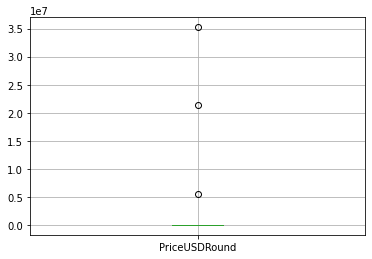

In [ ]:
data.boxplot(column = 'PriceUSDRound')

In [ ]:
Q1 = data['PriceUSDRound'].quantile(0.25)
Q3 = data['PriceUSDRound'].quantile(0.75)
IQR = Q3-Q1
LowerCutOff = Q1-1.5*IQR
HigherCutOff = Q3+1.5*IQR
min = data['PriceUSDRound'].min()
max = data['PriceUSDRound'].max()
min, LowerCutOff, Q1, Q3,HigherCutOff, max, IQR

(0.0, -4510.0275, 2924.16, 7880.285, 15314.4725, 35241203.91, 4956.125)

In [ ]:
data[(data['PriceUSDRound'] < LowerCutOff)| (data['PriceUSDRound']> HigherCutOff) ]

,Date,CustomerID,PaymentMode,Price,ShippingMode,Gender,ShippingTime,ProductType,Rating,Total_Ratings,...,7891.05,5626.36,8364.34,4409.67,9033.7,1569.86,1728.97,7815.95,8521.64,PriceUSDRound
7,2020-08-16,10480,Prepaid Card,£ 4032878.5368307503,Express,Female,19.0,Pants,1 star,6914,...,7891.05,5626.36,8364.34,4409.67,9033.7,1569.86,1728.97,7815.95,8521.64,5514255.65
14,2020-08-17,10487,Credit Card,£ 25773831.320659,Economy,Female,19.0,Pants,2 star,5783,...,7891.05,5626.36,8364.34,4409.67,9033.7,1569.86,1728.97,7815.95,8521.64,35241203.91
26,2020-08-02,10500,Direct Deposit,"$21,312,321.13",Mail,Male,5.0,Jeans,1 star,9410,...,7891.05,5626.36,8364.34,4409.67,9033.7,1569.86,1728.97,7815.95,8521.64,21312321.13


In [ ]:
print(data.shape)
data.drop([7,14,26], inplace=True)
data.shape

(91, 104)


(88, 104)

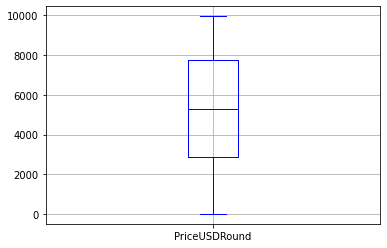

In [ ]:
data.boxplot(column = 'PriceUSDRound', color= 'blue ')